<a href="https://colab.research.google.com/github/MansiSharma7552/ML-Uni/blob/main/ASL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import tempfile
import tensorflow as tf  # TensorFlow library


In [ ]:
pip install numpy

In [ ]:
pip install numpy== :

ERROR: Invalid requirement: 'numpy==': Expected end or semicolon (after name and no valid version specifier)
    numpy==
         ^


In [ ]:
pip install -q tensorflow-model-optimization

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
pip install keras-models

In [ ]:
# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

from tensorflow_model_optimization.python.core.keras.compat import keras  # TensorFlow Model Optimization toolkit for Keras


In [ ]:
from tensorflow_model_optimization.python.core.keras.compat import keras  # TensorFlow Model Optimization toolkit for Keras


In [ ]:
# Download latest version
import kagglehub
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/asl-alphabet


In [ ]:
import os
print(os.listdir('/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'))

['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']


In [ ]:
# Define constants for data preprocessing and model training
imageSize = 224  # Desired size (width and height) for resizing images
target_dims = (imageSize, imageSize, 3)  # Target dimensions for input images
num_classes = 27  # Number of classes in the dataset after exclusion

# Training data directory path
train_dir = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'  # Path to the dataset folder

In [ ]:
import cv2
def get_data(data_dir) :
    images = []
    labels = []

    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)

    return images, labels

X, y = get_data(train_dir)

Obtaining images of N ...
Obtaining images of R ...
Obtaining images of space ...
Obtaining images of B ...
Obtaining images of I ...
Obtaining images of del ...
Obtaining images of F ...
Obtaining images of H ...
Obtaining images of E ...
Obtaining images of U ...
Obtaining images of M ...
Obtaining images of X ...
Obtaining images of K ...
Obtaining images of Q ...
Obtaining images of Y ...
Obtaining images of S ...
Obtaining images of G ...
Obtaining images of A ...
Obtaining images of O ...
Obtaining images of T ...
Obtaining images of V ...
Obtaining images of Z ...
Obtaining images of C ...
Obtaining images of P ...
Obtaining images of L ...
Obtaining images of W ...
Obtaining images of D ...
Obtaining images of nothing ...
Obtaining images of J ...


In [ ]:
print(len(X), len(y))

87000 87000


In [ ]:
print(len(X[0]),X[0].shape)
print(X[0])

32 (32, 32, 3)
[[[127  88  98]
  [ 99  97 104]
  [ 96  97  98]
  ...
  [ 74  56  75]
  [ 74  58  60]
  [137 117 119]]

 [[ 83  78  93]
  [ 33  68  80]
  [ 31  63  78]
  ...
  [ 44  65  81]
  [117 134 130]
  [135 128 130]]

 [[ 94  80  91]
  [ 55  91  95]
  [ 53  76  98]
  ...
  [126 131 134]
  [136 130 131]
  [138 135 139]]

 ...

 [[211 185 166]
  [183 180 175]
  [185 182 174]
  ...
  [120 120 126]
  [128 130 131]
  [133 134 138]]

 [[213 185 168]
  [186 190 173]
  [181 186 173]
  ...
  [118 122 123]
  [125 124 132]
  [132 132 135]]

 [[211 188 178]
  [184 194 172]
  [189 193 178]
  ...
  [117 121 123]
  [123 124 122]
  [124 132 137]]]


In [ ]:
# Data Visualisation
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 640x480 with 0 Axes>

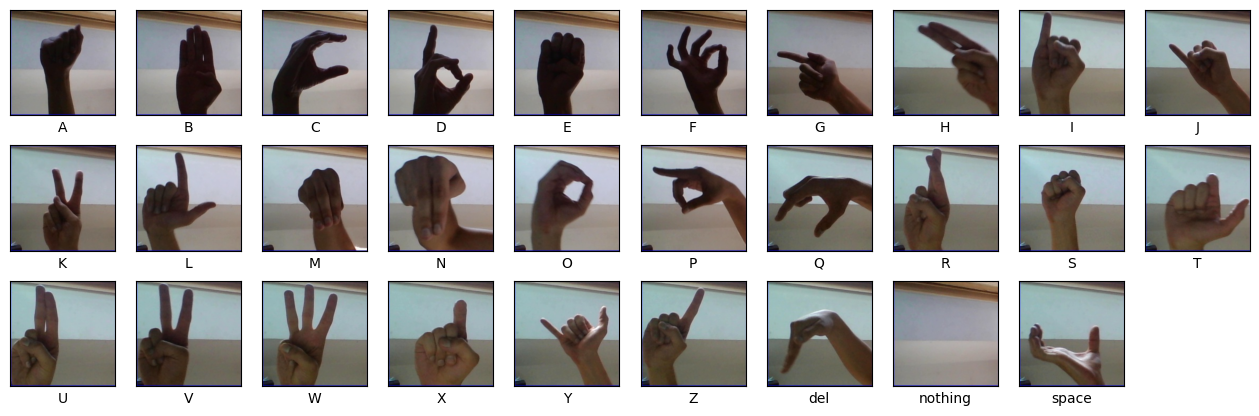

In [ ]:
import matplotlib.pyplot as plt
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])

plot_sample_images()

In [ ]:
# Data Preprocessing
from keras import utils
from sklearn.model_selection import train_test_split

def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0

    label_encoded_y = utils.to_categorical(y)

    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [ ]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)
print(x_test[0])

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)
[[[0.57254905 0.3764706  0.3372549 ]
  [0.44313726 0.37254903 0.3764706 ]
  [0.4392157  0.35686275 0.3764706 ]
  ...
  [0.24313726 0.11764706 0.15686275]
  [0.27450982 0.15294118 0.19215687]
  [0.28627452 0.20392157 0.25882354]]

 [[0.76862746 0.65882355 0.5686275 ]
  [0.654902   0.6784314  0.5803922 ]
  [0.6313726  0.6392157  0.5529412 ]
  ...
  [0.20784314 0.2        0.28627452]
  [0.20392157 0.20784314 0.28627452]
  [0.1764706  0.20784314 0.3019608 ]]

 [[0.8039216  0.68235296 0.5882353 ]
  [0.68235296 0.7137255  0.59607846]
  [0.70980394 0.7058824  0.6039216 ]
  ...
  [0.27058825 0.30980393 0.3882353 ]
  [0.23921569 0.2784314  0.35686275]
  [0.21176471 0.2627451  0.36078432]]

 ...

 [[0.49019608 0.3137255  0.2901961 ]
  [0.4862745  0.45490196 0.42352942]
  [0.30980393 0.3372549  0.35686275]
  ...
  [0.39607844 0.44313726 0.48235294]
  [0.39215687 0.4392157  0.47843137]
  [0.37254903 0.44313726 0.49803922]]

 [[0.337254

In [ ]:
# Defining CNN Model
classes = 29
batch = 32
epochs = 8
learning_rate = 0.001

In [ ]:
model = keras.Sequential([
keras.layers.Conv2D(8, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
#BatchNormalization(),

keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
#BatchNormalization(),
#Dropout(0.2),

keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
#BatchNormalization(),

keras.layers.Flatten(),
#Dropout(0.2),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(classes, activation='softmax'),
                         ])

In [ ]:
opt = Adam(learning_rate)
#adam = Adam(learning_rate)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 24)       │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,397 (122.64 KB)

 Trainable params: 31,397 (122.64 KB)

 Non-trainable params: 0 (0.00 B)

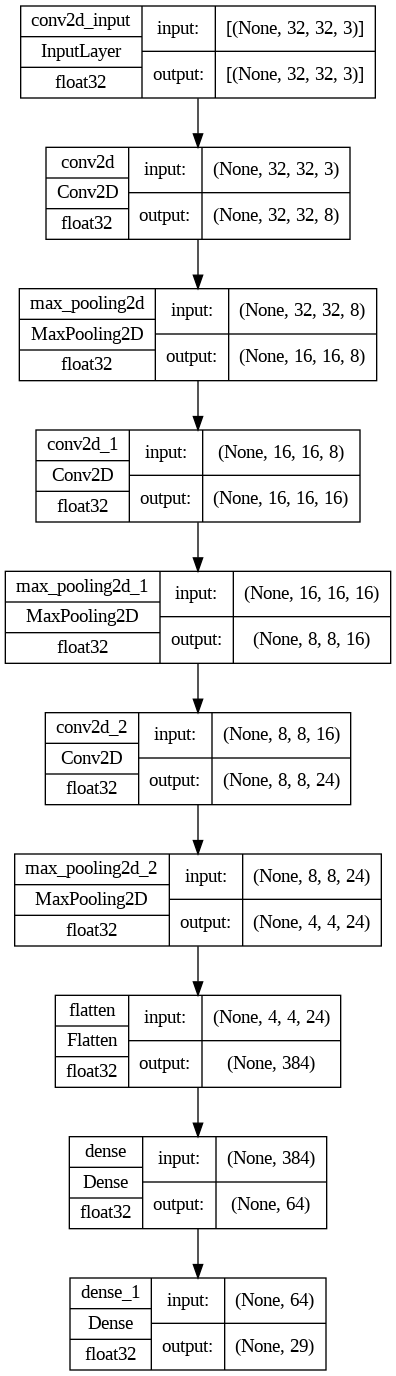

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
keras.utils.plot_model(model, show_dtype=True,
                       show_layer_names=True, show_shapes=True,
                       to_file='model.png')

In [ ]:
pip install visualkeras

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


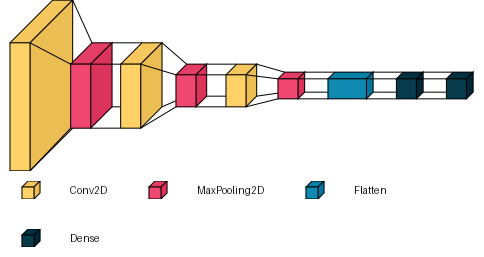

In [ ]:
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=30)

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=2)

Epoch 1/8
1958/1958 - 63s - loss: 1.4915 - accuracy: 0.5423 - val_loss: 0.7013 - val_accuracy: 0.7672 - 63s/epoch - 32ms/step
Epoch 2/8
1958/1958 - 48s - loss: 0.4906 - accuracy: 0.8358 - val_loss: 0.3450 - val_accuracy: 0.8876 - 48s/epoch - 24ms/step
Epoch 3/8
1958/1958 - 50s - loss: 0.2778 - accuracy: 0.9055 - val_loss: 0.2459 - val_accuracy: 0.9165 - 50s/epoch - 26ms/step
Epoch 4/8
1958/1958 - 47s - loss: 0.1855 - accuracy: 0.9359 - val_loss: 0.1720 - val_accuracy: 0.9395 - 47s/epoch - 24ms/step
Epoch 5/8
1958/1958 - 67s - loss: 0.1410 - accuracy: 0.9513 - val_loss: 0.1704 - val_accuracy: 0.9378 - 67s/epoch - 34ms/step
Epoch 6/8
1958/1958 - 52s - loss: 0.1080 - accuracy: 0.9627 - val_loss: 0.2548 - val_accuracy: 0.9103 - 52s/epoch - 26ms/step
Epoch 7/8
1958/1958 - 51s - loss: 0.0935 - accuracy: 0.9678 - val_loss: 0.0673 - val_accuracy: 0.9762 - 51s/epoch - 26ms/step
Epoch 8/8
1958/1958 - 49s - loss: 0.0809 - accuracy: 0.9720 - val_loss: 0.0735 - val_accuracy: 0.9745 - 49s/epoch - 25

In [ ]:
#Evaluation Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test loss', test_loss)

272/272 [==============================] - 3s 9ms/step - loss: 0.0854 - accuracy: 0.9708
Test Accuracy: 0.9708045721054077
Test loss 0.0854317843914032


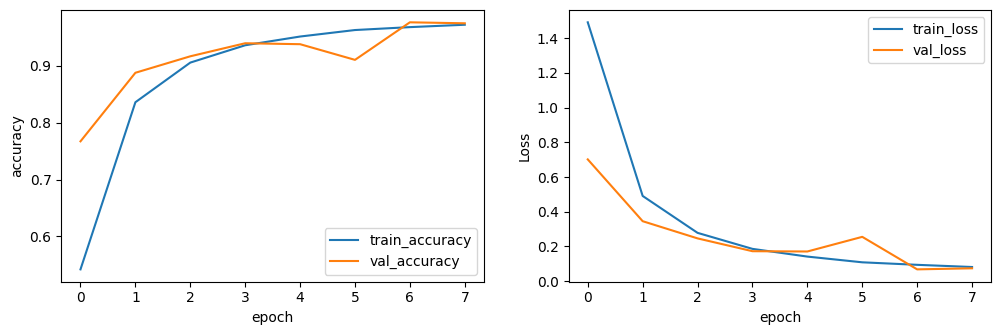

In [ ]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_results(model)

In [ ]:
model.variables[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 8) dtype=float32, numpy=
array([[[[ 0.32115996,  0.3397672 , -0.18748516,  0.2721373 ,
           0.01024   ,  0.14906201, -0.2338161 , -0.18242873],
         [ 0.3791301 ,  0.2907293 ,  0.08356088,  0.17471606,
           0.28607368, -0.10779379, -0.21212672, -0.40416148],
         [ 0.15363367,  0.07308281, -0.05562752,  0.24078754,
           0.18539485,  0.14846638,  0.16197917, -0.13039906]],

        [[ 0.27751303, -0.05737743,  0.33067623, -0.25730434,
           0.3684058 ,  0.26908523, -0.42909995,  0.21970393],
         [ 0.2813495 , -0.1267684 ,  0.1166731 , -0.19162977,
           0.16978605, -0.2616898 , -0.45623323,  0.16430832],
         [ 0.18535072,  0.01256318,  0.13696504,  0.26621133,
           0.38838086,  0.06359788,  0.21612167, -0.24630839]],

        [[ 0.04043165, -0.05738886,  0.01737933, -0.21981098,
          -0.46499774,  0.27871972, -0.15938073,  0.40700215],
         [ 0.32206598, -0.27013344,  0.4965942 , 

In [ ]:
model.save_weights("base_model_weights.weights.h5")

In [ ]:
_, keras_file = tempfile.mkstemp('.h5')
model.save('my_model.keras')
print('Saved pruned Keras model to:', keras_file)

Saved pruned Keras model to: /tmp/tmpztib6mvp.h5


In [ ]:
pip install -q tensorflow-model-optimization

In [ ]:
import tensorflow_model_optimization as tfmot
import tensorflow as tf

In [ ]:
# Define the pruning parameters, including the pruning schedule
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
        final_sparsity=0.90,
        begin_step=0,
        end_step=2000)
}


In [ ]:
model_for_pruning = prune_low_magnitude(model, **pruning_params)

In [ ]:
# Compile the pruned model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model_for_pruning.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create a temporary directory to store logs
logdir = tempfile.mkdtemp()

In [ ]:
# Define callbacks for pruning, including updating the pruning step and logging summaries
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

In [ ]:
# Fit the model with pruning to further optimize its performance
model_for_pruning.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=2,callbacks=callbacks)


Epoch 1/8
1958/1958 - 76s - loss: 1.6633 - accuracy: 0.5388 - val_loss: 1.4155 - val_accuracy: 0.5559 - 76s/epoch - 39ms/step
Epoch 2/8
1958/1958 - 49s - loss: 1.1067 - accuracy: 0.6451 - val_loss: 0.9360 - val_accuracy: 0.6951 - 49s/epoch - 25ms/step
Epoch 3/8
1958/1958 - 55s - loss: 0.8303 - accuracy: 0.7254 - val_loss: 0.7725 - val_accuracy: 0.7430 - 55s/epoch - 28ms/step
Epoch 4/8
1958/1958 - 50s - loss: 0.7106 - accuracy: 0.7623 - val_loss: 0.7075 - val_accuracy: 0.7618 - 50s/epoch - 26ms/step
Epoch 5/8
1958/1958 - 49s - loss: 0.6361 - accuracy: 0.7851 - val_loss: 0.6423 - val_accuracy: 0.7821 - 49s/epoch - 25ms/step
Epoch 6/8
1958/1958 - 53s - loss: 0.5851 - accuracy: 0.8022 - val_loss: 0.5962 - val_accuracy: 0.7981 - 53s/epoch - 27ms/step
Epoch 7/8
1958/1958 - 49s - loss: 0.5477 - accuracy: 0.8145 - val_loss: 0.5745 - val_accuracy: 0.8074 - 49s/epoch - 25ms/step
Epoch 8/8
1958/1958 - 50s - loss: 0.5187 - accuracy: 0.8243 - val_loss: 0.5546 - val_accuracy: 0.8134 - 50s/epoch - 26

In [ ]:
# Display the total number of parameters before and after pruning
print("Total params before pruning:", model.count_params())
print("Total params after pruning:", model_for_pruning.count_params())

# Reset the test generator and evaluate the pruned model on the test set
test_loss, test_acc = model_for_pruning.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test loss', test_loss)

Total params before pruning: 31397
Total params after pruning: 62667
272/272 [==============================] - 3s 10ms/step - loss: 0.5533 - accuracy: 0.8151
Test Accuracy: 0.8150574564933777
Test loss 0.5532872080802917


In [ ]:
# Strip pruning from the pruned model for export
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

# Save the pruned Keras model to a temporary file without including the optimizer
_, pruned_keras_file = tempfile.mkstemp('.h5')
keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

<ipython-input-77-7a343cce8a25>:6: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)


Saved pruned Keras model to: /tmp/tmpz1m5di4e.h5


In [ ]:
# Convert the pruned Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

# Save the pruned TensorFlow Lite model to a temporary file
_, pruned_tflite_file = tempfile.mkstemp('.tflite')
with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

# Print the path to the saved pruned TFLite model
print('Saved pruned TFLite model to:', pruned_tflite_file)

Saved pruned TFLite model to: /tmp/tmpe1oq6fvy.tflite


In [ ]:
# Convert the pruned Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

# Save the pruned TensorFlow Lite model to a temporary file
_, pruned_tflite_file = tempfile.mkstemp('.tflite')
with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

# Print the path to the saved pruned TFLite model
print('Saved pruned TFLite model to:', pruned_tflite_file)

Saved pruned TFLite model to: /tmp/tmpi1aoi5ir.tflite


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
# Calculate the sizes of the gzipped models
keras_size = get_gzipped_model_size(keras_file)
pruned_keras_size = get_gzipped_model_size(pruned_keras_file)
pruned_tflite_size = get_gzipped_model_size(pruned_tflite_file)

# Print the sizes of the gzipped models
print("Size of gzipped baseline Keras model: %.2f bytes" % (keras_size))
print("Size of gzipped pruned Keras model: %.2f bytes" % (pruned_keras_size))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (pruned_tflite_size))

Size of gzipped baseline Keras model: 136.00 bytes
Size of gzipped pruned Keras model: 27971.00 bytes
Size of gzipped pruned TFlite model: 25844.00 bytes


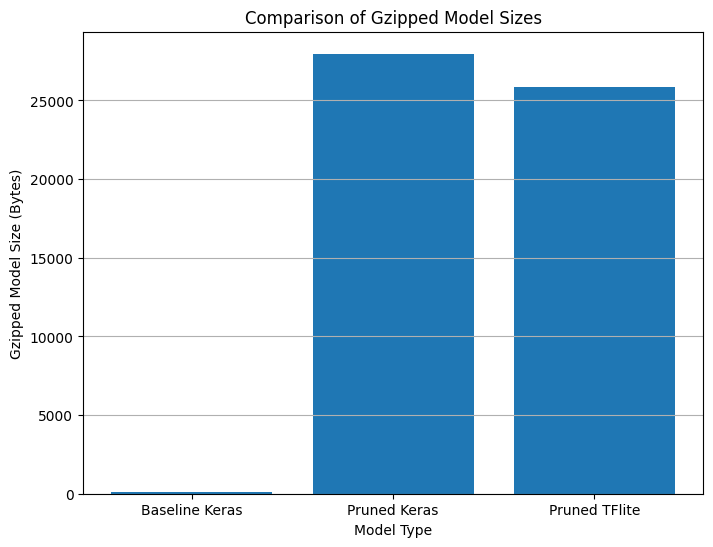

In [ ]:
# Model names (adjust labels as needed)
model_names = ["Baseline Keras", "Pruned Keras", "Pruned TFlite"]

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(model_names, [keras_size, pruned_keras_size, pruned_tflite_size])
plt.xlabel("Model Type")
plt.ylabel("Gzipped Model Size (Bytes)")
plt.title("Comparison of Gzipped Model Sizes")

# Display gridlines for better readability
plt.grid(axis='y')

# Display the plot
plt.show()

In [ ]:
# Convert the pruned Keras model to a quantized TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

# Save the quantized and pruned TensorFlow Lite model to a temporary file
_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')
with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

# Print the path to the saved quantized and pruned TFLite model
print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

# Calculate and print the sizes of the gzipped models
print("Size of gzipped baseline Keras model: %.2f bytes" % (keras_size))
quantized_and_pruned_tflite_size = get_gzipped_model_size(quantized_and_pruned_tflite_file)
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (quantized_and_pruned_tflite_size))

Saved quantized and pruned TFLite model to: /tmp/tmpf02xyvlw.tflite
Size of gzipped baseline Keras model: 136.00 bytes
Size of gzipped pruned and quantized TFlite model: 9793.00 bytes


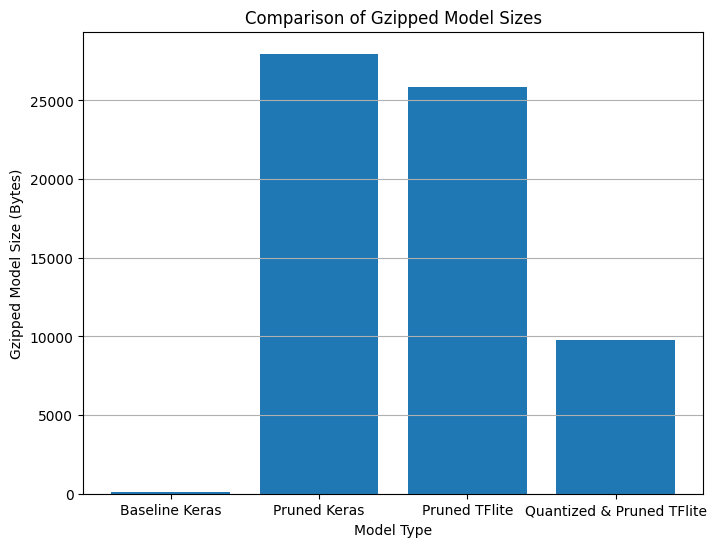

In [ ]:
model_names = ["Baseline Keras", "Pruned Keras", "Pruned TFlite", "Quantized & Pruned TFlite"]

plt.figure(figsize=(8, 6))
plt.bar(model_names, [keras_size, pruned_keras_size, pruned_tflite_size, quantized_and_pruned_tflite_size])
plt.xlabel("Model Type")
plt.ylabel("Gzipped Model Size (Bytes)")
plt.title("Comparison of Gzipped Model Sizes")
plt.grid(axis='y')
plt.show()

In [ ]:
print("Total params before pruning:", model.count_params())
print("Total params after pruning:", model_for_pruning.count_params())
print("Total params after export:", model_for_export.count_params())

Total params before pruning: 31397
Total params after pruning: 62667
Total params after export: 31397
